# Name : Ayushi Singh

# Roll No : 200258

# Warehouse Location Problem

An online retailer has collected data on the location (latitude and longitude) of its customers
and their average monthly purchase (in kgs) for four product categories - Apparel, Books,
Electronics and Grocery. 

Importing libraries 

In [41]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [42]:
dataset=pd.read_csv('/content/Customer_Data.csv')

In [43]:
dataset.head()

,Latitude,Longitude,Apparel,Books,Electronics,Grocery
0,30.453290,76.394585,6.83,4.34,0.77,14.58
1,26.301717,80.133402,15.48,9.89,0.93,1.38
2,10.482971,76.384688,1.21,8.26,0.57,12.96
3,26.301717,80.130000,3.04,9.54,0.53,15.58
4,31.022162,76.724332,6.74,0.21,14.40,1.14


In [44]:
np.mean(dataset['Latitude'])

24.229996390126583

In [45]:
print(np.sum(dataset['Apparel']))
print(np.sum(dataset['Books']))
print(np.sum(dataset['Electronics']))
print(np.sum(dataset['Grocery']))
print()
print(401.7200000000001+
561.7599999999999+
300.88999999999993+
787.22)

405.2400000000001
589.91
309.02
806.3399999999999

2051.59


In [80]:
dataset.describe()

,Latitude,Longitude,Apparel,Books,Electronics,Grocery
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,24.229996,79.481421,5.129620,7.467215,3.911646,10.206835
std,4.952235,3.545489,4.944455,6.412815,4.778758,5.929100
min,8.469167,73.353185,0.160000,0.110000,0.110000,0.140000
25%,22.276201,77.014239,0.935000,0.770000,0.670000,6.145000
50%,26.504384,80.196540,3.220000,7.510000,2.100000,9.230000
75%,26.529297,80.234894,8.310000,10.740000,5.255000,15.655000
max,31.022162,91.778177,18.410000,19.560000,18.260000,19.610000


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Latitude     79 non-null     float64
 1   Longitude    79 non-null     float64
 2   Apparel      79 non-null     float64
 3   Books        79 non-null     float64
 4   Electronics  79 non-null     float64
 5   Grocery      79 non-null     float64
dtypes: float64(6)
memory usage: 3.8 KB


In [48]:
dataset[dataset['Latitude']>38]


,Latitude,Longitude,Apparel,Books,Electronics,Grocery


In [49]:
dataset[dataset['Longitude']<68]

,Latitude,Longitude,Apparel,Books,Electronics,Grocery


In [50]:
dataset

,Latitude,Longitude,Apparel,Books,Electronics,Grocery
0,30.453290,76.394585,6.83,4.34,0.77,14.58
1,26.301717,80.133402,15.48,9.89,0.93,1.38
2,10.482971,76.384688,1.21,8.26,0.57,12.96
3,26.301717,80.130000,3.04,9.54,0.53,15.58
4,31.022162,76.724332,6.74,0.21,14.40,1.14
...,...,...,...,...,...,...
74,13.020800,80.224000,3.22,8.30,0.40,17.63
75,10.078730,78.670417,2.70,0.40,9.43,11.25
76,8.469167,76.946111,0.66,7.51,3.08,10.02
77,17.712100,83.312100,0.48,18.61,7.60,3.54


In [51]:
dataset.drop(dataset[dataset['Longitude']==26.9658].index,inplace=True)
dataset.drop(dataset[dataset['Latitude']==41.205].index,inplace=True,axis=0)

In [52]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


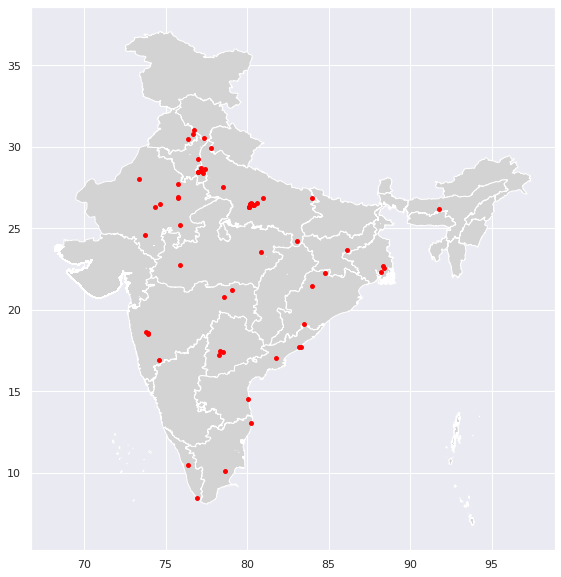

In [53]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(dataset['Longitude'], dataset['Latitude'])]
gdf = GeoDataFrame(dataset, geometry=geometry)   
#this is a simple map that goes with geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file('/content/Indian_states.shp')
gdf.plot(ax=world.plot(figsize=(20, 10),color='lightgrey'), marker='o', color='red', markersize=15);
# ax.set_title('Distribution of Customers')

In [54]:
gdf

,Latitude,Longitude,Apparel,Books,Electronics,Grocery,geometry
0,30.453290,76.394585,6.83,4.34,0.77,14.58,POINT (76.39459 30.45329)
1,26.301717,80.133402,15.48,9.89,0.93,1.38,POINT (80.13340 26.30172)
2,10.482971,76.384688,1.21,8.26,0.57,12.96,POINT (76.38469 10.48297)
3,26.301717,80.130000,3.04,9.54,0.53,15.58,POINT (80.13000 26.30172)
4,31.022162,76.724332,6.74,0.21,14.40,1.14,POINT (76.72433 31.02216)
...,...,...,...,...,...,...,...
74,13.020800,80.224000,3.22,8.30,0.40,17.63,POINT (80.22400 13.02080)
75,10.078730,78.670417,2.70,0.40,9.43,11.25,POINT (78.67042 10.07873)
76,8.469167,76.946111,0.66,7.51,3.08,10.02,POINT (76.94611 8.46917)
77,17.712100,83.312100,0.48,18.61,7.60,3.54,POINT (83.31210 17.71210)


In [55]:
#data_with_clusters

In [56]:
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

In [57]:
from itertools import combinations 
from sklearn.cluster import KMeans
import folium

In [58]:
# Instantiate map
m = folium.Map(location=dataset[['Latitude', 'Longitude']].mean(),
               )
                            
# Add volume points
for _, row in dataset.iterrows():
    folium.Marker(location=[row['Latitude'], 
                                  row['Longitude']]).add_to(m)
        
# Zoom based on volume points
m.fit_bounds(dataset[['Latitude', 'Longitude']].values.tolist())
# Show the map

# m

In [59]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

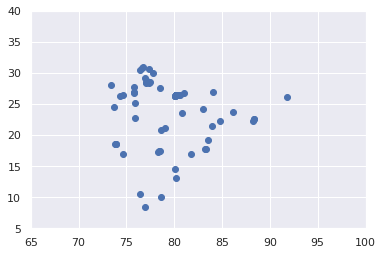

In [81]:
plt.scatter(dataset['Longitude'],dataset['Latitude'])
plt.ylim(5,40)
plt.xlim(65,100)
plt.show()

In [61]:
x = dataset.iloc[:,0:2] # 1t for rows and second for columns
x

,Latitude,Longitude
0,30.453290,76.394585
1,26.301717,80.133402
2,10.482971,76.384688
3,26.301717,80.130000
4,31.022162,76.724332
...,...,...
74,13.020800,80.224000
75,10.078730,78.670417
76,8.469167,76.946111
77,17.712100,83.312100


In [62]:
kmeans = KMeans(6)
kmeans.fit(x)

KMeans(n_clusters=6)

In [63]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 2, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 5, 0, 0, 2, 5, 2, 3, 5, 5, 5, 5, 1, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 1, 3, 4, 4, 4, 4, 1, 1], dtype=int32)

In [64]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
centroids

array([[28.26073464, 76.21267124],
       [18.606831  , 83.1558004 ],
       [26.37226819, 80.42505602],
       [18.94454559, 76.50021999],
       [11.31580717, 78.46255081],
       [23.26858751, 87.94300961]])

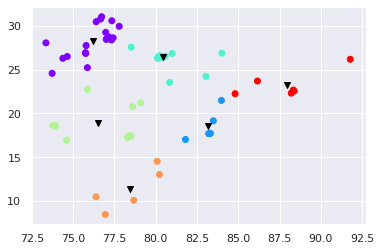

In [65]:
data_with_clusters = dataset.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.scatter(centroids[:,1],centroids[:,0], color='black',marker='v')

Text(0, 0.5, 'WCSS')

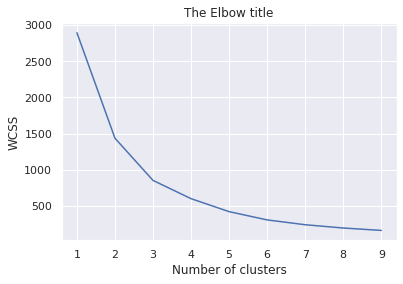

In [66]:
wcss=[]
for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

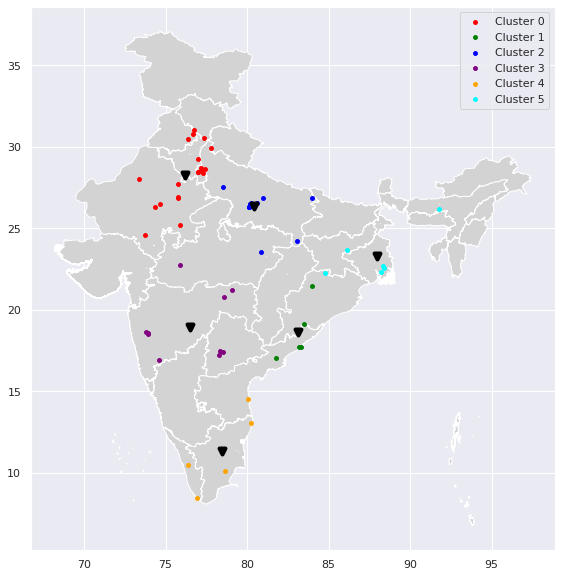

In [67]:
geometry = [Point(xy) for xy in zip(dataset['Longitude'], dataset['Latitude'])]
gdf = GeoDataFrame(data_with_clusters, geometry=geometry)   
#this is a simple map that goes with geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file('/content/Indian_states.shp')
fig,ax=plt.subplots(figsize=(20,10))
world.plot(ax=ax,color='lightgrey')
gdf[gdf['Clusters']==0].plot(ax=ax, marker='o', color='red', markersize=15,label='Cluster 0');
gdf[gdf['Clusters']==1].plot(ax=ax, marker='o', color='green', markersize=15,label='Cluster 1');
gdf[gdf['Clusters']==2].plot(ax=ax, marker='o', color='blue', markersize=15,label='Cluster 2');
gdf[gdf['Clusters']==3].plot(ax=ax, marker='o', color='purple', markersize=15,label='Cluster 3');
gdf[gdf['Clusters']==4].plot(ax=ax, marker='o', color='orange', markersize=15,label='Cluster 4');
gdf[gdf['Clusters']==5].plot(ax=ax, marker='o', color='cyan', markersize=15,label='Cluster 5');
plt.scatter(centroids[:,1],centroids[:,0],marker='v',color='black',linewidths=4)
ax.legend()
# ax.set_title('Distribution of Customers')

In [68]:
data_with_clusters.groupby(by='Clusters').sum()

,Latitude,Longitude,Apparel,Books,Electronics,Grocery
Clusters,,,,,,
0,565.214693,1524.253425,93.66,128.19,87.69,223.01
1,93.034155,415.779002,19.11,46.91,40.49,38.01
2,870.284850,2654.026849,191.17,250.74,93.49,333.59
3,189.445456,765.002200,57.77,50.89,53.09,107.62
4,56.579036,392.312754,11.95,42.61,13.75,61.09
5,139.611525,527.658058,31.58,70.57,20.51,43.02


In [69]:
centroids_demo = np.concatenate((centroids, [[26.5,82],[28.42,77.1]]))
centroids_demo[1]=[26,79.5]
centroids_demo[3]=[23.2,88]
centroids_demo[6]=[30.5,77]
centroids_demo

array([[28.26073464, 76.21267124],
       [26.        , 79.5       ],
       [26.37226819, 80.42505602],
       [23.2       , 88.        ],
       [11.31580717, 78.46255081],
       [23.26858751, 87.94300961],
       [30.5       , 77.        ],
       [28.42      , 77.1       ]])

In [70]:
centroids

array([[28.26073464, 76.21267124],
       [18.606831  , 83.1558004 ],
       [26.37226819, 80.42505602],
       [18.94454559, 76.50021999],
       [11.31580717, 78.46255081],
       [23.26858751, 87.94300961]])

In [71]:
kmeans = KMeans(9)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
centroids = kmeans.cluster_centers_
data_with_clusters = dataset.copy()
data_with_clusters['Clusters'] = identified_clusters 

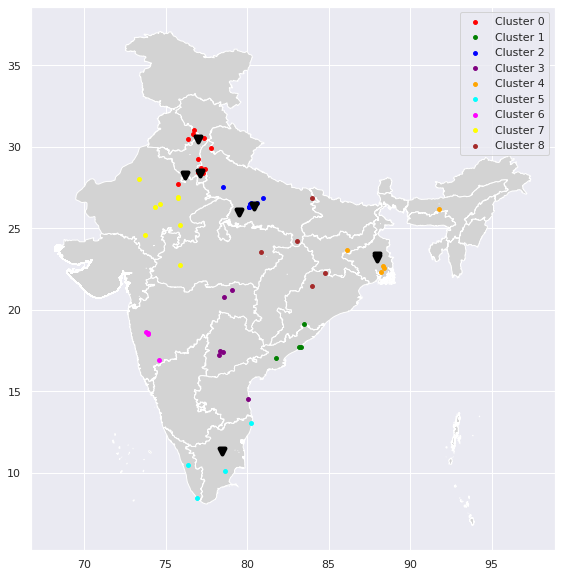

In [72]:
geometry = [Point(xy) for xy in zip(dataset['Longitude'], dataset['Latitude'])]
gdf = GeoDataFrame(data_with_clusters, geometry=geometry)   
#this is a simple map that goes with geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file('/content/Indian_states.shp')
fig,ax=plt.subplots(figsize=(20,10))
world.plot(ax=ax,color='lightgrey')
gdf[gdf['Clusters']==0].plot(ax=ax, marker='o', color='red', markersize=15,label='Cluster 0');
gdf[gdf['Clusters']==1].plot(ax=ax, marker='o', color='green', markersize=15,label='Cluster 1');
gdf[gdf['Clusters']==2].plot(ax=ax, marker='o', color='blue', markersize=15,label='Cluster 2');
gdf[gdf['Clusters']==3].plot(ax=ax, marker='o', color='purple', markersize=15,label='Cluster 3');
gdf[gdf['Clusters']==4].plot(ax=ax, marker='o', color='orange', markersize=15,label='Cluster 4');
gdf[gdf['Clusters']==5].plot(ax=ax, marker='o', color='cyan', markersize=15,label='Cluster 5');
gdf[gdf['Clusters']==6].plot(ax=ax, marker='o', color='magenta', markersize=15,label='Cluster 6');
gdf[gdf['Clusters']==7].plot(ax=ax, marker='o', color='yellow', markersize=15,label='Cluster 7');
gdf[gdf['Clusters']==8].plot(ax=ax, marker='o', color='brown', markersize=15,label='Cluster 8');
plt.scatter(centroids_demo[:,1],centroids_demo[:,0],marker='v',color='black',linewidths=4)
ax.legend()
# ax.set_title('Distribution of Customers')

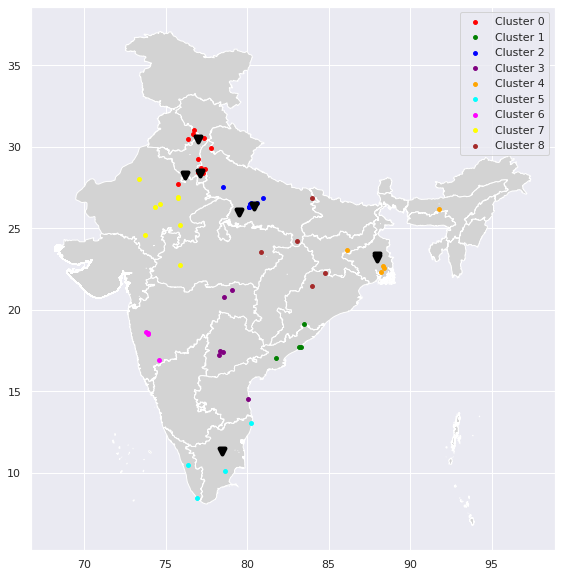

In [73]:
geometry = [Point(xy) for xy in zip(dataset['Longitude'], dataset['Latitude'])]
gdf = GeoDataFrame(data_with_clusters, geometry=geometry)   
#this is a simple map that goes with geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file('/content/Indian_states.shp')
fig,ax=plt.subplots(figsize=(20,10))
world.plot(ax=ax,color='lightgrey')
gdf[gdf['Clusters']==0].plot(ax=ax, marker='o', color='red', markersize=15,label='Cluster 0');
gdf[gdf['Clusters']==1].plot(ax=ax, marker='o', color='green', markersize=15,label='Cluster 1');
gdf[gdf['Clusters']==2].plot(ax=ax, marker='o', color='blue', markersize=15,label='Cluster 2');
gdf[gdf['Clusters']==3].plot(ax=ax, marker='o', color='purple', markersize=15,label='Cluster 3');
gdf[gdf['Clusters']==4].plot(ax=ax, marker='o', color='orange', markersize=15,label='Cluster 4');
gdf[gdf['Clusters']==5].plot(ax=ax, marker='o', color='cyan', markersize=15,label='Cluster 5');
gdf[gdf['Clusters']==6].plot(ax=ax, marker='o', color='magenta', markersize=15,label='Cluster 6');
gdf[gdf['Clusters']==7].plot(ax=ax, marker='o', color='yellow', markersize=15,label='Cluster 7');
gdf[gdf['Clusters']==8].plot(ax=ax, marker='o', color='brown', markersize=15,label='Cluster 8');
plt.scatter(centroids_demo[:,1],centroids_demo[:,0],marker='v',color='black',linewidths=4)
ax.legend()
# ax.set_title('Distribution of Customers')

In [74]:
data_with_clusters.groupby(by='Clusters').sum()

,Latitude,Longitude,Apparel,Books,Electronics,Grocery
Clusters,,,,,,
0,380.863119,1000.771499,62.06,79.30,71.30,127.39
1,71.560633,331.801949,6.83,46.46,35.51,28.95
2,795.661915,2406.137495,175.17,235.03,66.17,317.98
3,108.585445,472.964907,17.80,49.28,35.78,66.01
4,117.370126,442.851062,15.22,68.38,19.80,35.79
5,42.051668,312.225216,7.79,24.47,13.48,51.86
6,72.653490,296.237887,34.25,19.60,14.92,31.88
7,207.085463,599.368870,41.48,49.04,19.05,114.58
8,118.337856,416.673403,44.64,18.35,33.01,31.90


In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [76]:
X = dataset.iloc[:, [1, 0]].values

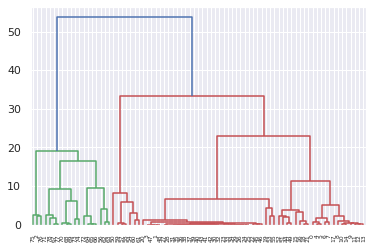

In [77]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [78]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
labels

array([0, 3, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 0, 5, 0, 0, 3, 5, 3, 1, 5, 5, 5, 5, 5, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 4, 4, 2, 2])

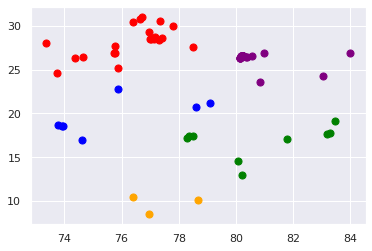

In [79]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()